In [1]:
import pandas as pd
import vl_convert as vlc
from gprofiler import GProfiler
gp = GProfiler(return_dataframe=True)
from enum import Enum
import math
import altair as alt
import numpy as np

In [2]:
delta_correlation_df = pd.read_csv('delta_correlation_df_with_significance.csv')
delta_correlation_df

,Gene,Delta_Correlation,P_Value,FDR,Cancer,Significant
0,A1BG,-0.198013,2.451044e-01,4.045115e-01,HNSCC,False
1,A2M,-0.118384,4.480278e-01,6.091130e-01,HNSCC,False
2,A2ML1,-0.023469,2.918125e-01,4.561968e-01,HNSCC,False
3,AAAS,0.275905,1.051756e-01,2.209072e-01,HNSCC,False
4,AACS,-0.136836,1.800586e-01,3.266475e-01,HNSCC,False
...,...,...,...,...,...,...
50684,ZWINT,1.219024,2.267627e-09,1.049863e-07,Endometrial,True
50685,ZXDC,-0.346532,2.983295e-01,5.386144e-01,Endometrial,False
50686,ZYG11B,0.768196,5.463938e-04,5.319699e-03,Endometrial,True
50687,ZYX,0.253630,2.456049e-01,4.795301e-01,Endometrial,False


In [3]:
kegg_profiles = []
for cancer in pd.unique(delta_correlation_df.Cancer):
    
    cancer_df = delta_correlation_df[delta_correlation_df.Cancer == cancer]
    background_genes  = list(pd.unique(cancer_df.Gene))
    cancer_df = cancer_df[cancer_df.FDR < 0.05]
    queryS = list(pd.unique(cancer_df.Gene))
    cancer_profile = gp.profile(organism='hsapiens', query = queryS, no_iea=True, sources = ["KEGG"],
                       ordered=True, no_evidences=False, background= background_genes)
    kegg_profiles.append(cancer_profile)

In [4]:
kegg_profiles[0]

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences
0,KEGG,KEGG:00071,Fatty acid degradation,2.584315e-16,True,Fatty acid degradation,36,96,14,9748,0.145833,0.388889,query_1,[KEGG:00000],"[ACADL, ACADM, ACADS, ACADSB, ACAT1, ACSL1, AC...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
1,KEGG,KEGG:00620,Pyruvate metabolism,8.419616e-11,True,Pyruvate metabolism,40,96,11,9748,0.114583,0.275000,query_1,[KEGG:00000],"[ACACB, ACAT1, ACSS1, ACYP2, ADH1B, ADH4, ADH5...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
2,KEGG,KEGG:00280,"Valine, leucine and isoleucine degradation",2.057558e-09,True,"Valine, leucine and isoleucine degradation",43,125,11,9748,0.088000,0.255814,query_1,[KEGG:00000],"[ABAT, ACAD8, ACADM, ACADS, ACADSB, ACAT1, ACS...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
3,KEGG,KEGG:01212,Fatty acid metabolism,3.012817e-09,True,Fatty acid metabolism,44,36,8,9748,0.222222,0.181818,query_1,[KEGG:00000],"[ACADL, ACADM, ACADS, ACADSB, ACAT1, ACSF3, AC...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
4,KEGG,KEGG:01100,Metabolic pathways,2.194647e-08,True,Metabolic pathways,1023,106,44,9748,0.415094,0.043011,query_1,[KEGG:00000],"[AASDHPPT, AASS, ABAT, ABHD16A, ACACB, ACAD8, ...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
5,KEGG,KEGG:00010,Glycolysis / Gluconeogenesis,1.269594e-07,True,Glycolysis / Gluconeogenesis,54,97,10,9748,0.103093,0.185185,query_1,[KEGG:00000],"[ACSS1, ADH1B, ADH4, ADH5, ADH7, ALDH3A1, ALDH...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
6,KEGG,KEGG:02010,ABC transporters,3.769577e-06,True,ABC transporters,25,8,4,9748,0.500000,0.160000,query_1,[KEGG:00000],"[ABCA12, ABCC4, ABCC5, ABCD1]","[[KEGG], [KEGG], [KEGG], [KEGG]]"
7,KEGG,KEGG:00561,Glycerolipid metabolism,1.981839e-05,True,Glycerolipid metabolism,35,96,8,9748,0.083333,0.228571,query_1,[KEGG:00000],"[ABHD16A, AGK, AGPAT2, AGPAT4, AKR1B10, ALDH3A...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
8,KEGG,KEGG:00061,Fatty acid biosynthesis,6.364451e-05,True,Fatty acid biosynthesis,14,36,4,9748,0.111111,0.285714,query_1,[KEGG:00000],"[ACACB, ACSF3, ACSL1, ACSL4]","[[KEGG], [KEGG], [KEGG], [KEGG]]"
9,KEGG,KEGG:00410,beta-Alanine metabolism,6.478614e-05,True,beta-Alanine metabolism,23,96,6,9748,0.062500,0.260870,query_1,[KEGG:00000],"[ABAT, ACADS, ALDH3A1, ALDH3A2, ALDH7A1, ALDH9A1]","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG]]"


In [5]:
kegg_profiles[1]

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences
0,KEGG,KEGG:02010,ABC transporters,4.055685e-33,True,ABC transporters,32,38,18,11401,0.473684,0.562500,query_1,[KEGG:00000],"[ABCA1, ABCA12, ABCA3, ABCA6, ABCA8, ABCB1, AB...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
1,KEGG,KEGG:00071,Fatty acid degradation,1.093581e-21,True,Fatty acid degradation,39,259,21,11401,0.081081,0.538462,query_1,[KEGG:00000],"[ACAA1, ACAA2, ACADL, ACADM, ACADS, ACADSB, AC...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
2,KEGG,KEGG:01212,Fatty acid metabolism,1.825799e-18,True,Fatty acid metabolism,46,100,16,11401,0.160000,0.347826,query_1,[KEGG:00000],"[ACAA1, ACAA2, ACACA, ACADL, ACADM, ACADS, ACA...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
3,KEGG,KEGG:01100,Metabolic pathways,2.363552e-17,True,Metabolic pathways,1122,271,94,11401,0.346863,0.083779,query_1,[KEGG:00000],"[A4GALT, AACS, AADAT, AASDHPPT, AASS, ABAT, AC...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
4,KEGG,KEGG:00280,"Valine, leucine and isoleucine degradation",4.485984e-13,True,"Valine, leucine and isoleucine degradation",43,259,16,11401,0.061776,0.372093,query_1,[KEGG:00000],"[AACS, ABAT, ACAA1, ACAA2, ACAD8, ACADM, ACADS...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
5,KEGG,KEGG:00620,Pyruvate metabolism,2.702062e-09,True,Pyruvate metabolism,40,259,13,11401,0.050193,0.325000,query_1,[KEGG:00000],"[ACACA, ACAT1, ACAT2, ACSS1, ACYP1, ADH1B, ADH...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
6,KEGG,KEGG:04146,Peroxisome,1.182515e-08,True,Peroxisome,68,100,11,11401,0.110000,0.161765,query_1,[KEGG:00000],"[ABCD1, ABCD3, ABCD4, ACAA1, ACOT8, ACOX2, ACO...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
7,KEGG,KEGG:00010,Glycolysis / Gluconeogenesis,3.213301e-08,True,Glycolysis / Gluconeogenesis,54,262,14,11401,0.053435,0.259259,query_1,[KEGG:00000],"[ACSS1, ADH1B, ADH1C, ADH7, ADPGK, AKR1A1, ALD...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
8,KEGG,KEGG:00410,beta-Alanine metabolism,9.541976e-08,True,beta-Alanine metabolism,24,344,11,11401,0.031977,0.458333,query_1,[KEGG:00000],"[ABAT, ACADS, ACOX3, ALDH1B1, ALDH2, ALDH3A1, ...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
9,KEGG,KEGG:00061,Fatty acid biosynthesis,8.019074e-07,True,Fatty acid biosynthesis,14,100,6,11401,0.060000,0.428571,query_1,[KEGG:00000],"[ACACA, ACSF3, ACSL1, ACSL3, ACSL4, ACSL5]","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG]]"


In [6]:
kegg_profiles[2]

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences
0,KEGG,KEGG:01100,Metabolic pathways,2.759980e-15,True,Metabolic pathways,1078,115,57,9720,0.495652,0.052876,query_1,[KEGG:00000],"[AADAT, AASS, ABAT, ABO, ACAA1, ACAD8, ACADL, ...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
1,KEGG,KEGG:00071,Fatty acid degradation,5.536552e-14,True,Fatty acid degradation,38,106,13,9720,0.122642,0.342105,query_1,[KEGG:00000],"[ACAA1, ACADL, ACADM, ACADSB, ACOX1, ACSL4, AC...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
2,KEGG,KEGG:02010,ABC transporters,1.877000e-13,True,ABC transporters,26,16,8,9720,0.500000,0.307692,query_1,[KEGG:00000],"[ABCB1, ABCB6, ABCC1, ABCC3, ABCC6, ABCD1, ABC...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
3,KEGG,KEGG:01200,Carbon metabolism,2.672664e-09,True,Carbon metabolism,102,2349,61,9720,0.025968,0.598039,query_1,[KEGG:00000],"[ACO1, ACOX1, ACSS1, ACSS2, ADPGK, AGXT, ALDH6...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
4,KEGG,KEGG:00280,"Valine, leucine and isoleucine degradation",9.806711e-09,True,"Valine, leucine and isoleucine degradation",44,106,10,9720,0.094340,0.227273,query_1,[KEGG:00000],"[ABAT, ACAA1, ACAD8, ACADM, ACADSB, ACSF3, ALD...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
5,KEGG,KEGG:00010,Glycolysis / Gluconeogenesis,2.201093e-08,True,Glycolysis / Gluconeogenesis,57,109,11,9720,0.100917,0.192982,query_1,[KEGG:00000],"[ACSS1, ACSS2, ADH1C, ADH4, ADH6, ADPGK, ALDH1...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
6,KEGG,KEGG:01212,Fatty acid metabolism,4.308247e-08,True,Fatty acid metabolism,43,49,8,9720,0.163265,0.186047,query_1,[KEGG:00000],"[ACAA1, ACADL, ACADM, ACADSB, ACOX1, ACSF3, AC...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
7,KEGG,KEGG:04966,Collecting duct acid secretion,1.583289e-07,True,Collecting duct acid secretion,22,267,10,9720,0.037453,0.454545,query_1,[KEGG:00000],"[ATP6V0A1, ATP6V0A2, ATP6V0A4, ATP6V0D2, ATP6V...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
8,KEGG,KEGG:00620,Pyruvate metabolism,2.045459e-07,True,Pyruvate metabolism,43,106,9,9720,0.084906,0.209302,query_1,[KEGG:00000],"[ACSS1, ACSS2, ACYP2, ADH1C, ADH4, ADH6, ALDH1...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
9,KEGG,KEGG:04146,Peroxisome,7.660620e-07,True,Peroxisome,69,49,8,9720,0.163265,0.115942,query_1,[KEGG:00000],"[ABCD1, ABCD3, ACAA1, ACOT8, ACOX1, ACOX2, ACS...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."


In [7]:
kegg_profiles[3]

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences
0,KEGG,KEGG:02010,ABC transporters,1.054423e-29,True,ABC transporters,31,31,16,11080,0.516129,0.516129,query_1,[KEGG:00000],"[ABCA1, ABCA12, ABCA3, ABCA6, ABCB1, ABCB10, A...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
1,KEGG,KEGG:00071,Fatty acid degradation,1.679244e-12,True,Fatty acid degradation,38,200,14,11080,0.070000,0.368421,query_1,[KEGG:00000],"[ACAA2, ACADL, ACADM, ACADS, ACADVL, ACAT1, AC...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
2,KEGG,KEGG:01100,Metabolic pathways,3.101464e-12,True,Metabolic pathways,1108,231,77,11080,0.333333,0.069495,query_1,[KEGG:00000],"[AACS, AADAT, AASDHPPT, AASS, ABAT, ABHD16A, A...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
3,KEGG,KEGG:01212,Fatty acid metabolism,1.105716e-09,True,Fatty acid metabolism,45,81,10,11080,0.123457,0.222222,query_1,[KEGG:00000],"[ACAA2, ACACA, ACADL, ACADM, ACADS, ACADVL, AC...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
4,KEGG,KEGG:00280,"Valine, leucine and isoleucine degradation",8.719727e-08,True,"Valine, leucine and isoleucine degradation",42,200,11,11080,0.055000,0.261905,query_1,[KEGG:00000],"[AACS, ABAT, ACAA2, ACAD8, ACADM, ACADS, ACAT1...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
5,KEGG,KEGG:00410,beta-Alanine metabolism,7.436262e-06,True,beta-Alanine metabolism,24,200,8,11080,0.040000,0.333333,query_1,[KEGG:00000],"[ABAT, ACADS, ACOX3, ALDH2, ALDH3A2, ALDH3B1, ...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
6,KEGG,KEGG:04142,Lysosome,1.073193e-05,True,Lysosome,117,452,21,11080,0.046460,0.179487,query_1,[KEGG:00000],"[ACP2, ACP5, AGA, AP1G1, AP1G2, AP1M1, AP1M2, ...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
7,KEGG,KEGG:00640,Propanoate metabolism,1.684519e-05,True,Propanoate metabolism,28,84,6,11080,0.071429,0.214286,query_1,[KEGG:00000],"[ABAT, ACACA, ACADS, ACOX3, ACSS1, ACSS3]","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG]]"
8,KEGG,KEGG:00620,Pyruvate metabolism,1.757574e-05,True,Pyruvate metabolism,43,200,9,11080,0.045000,0.209302,query_1,[KEGG:00000],"[ACACA, ACAT1, ACSS1, ACYP2, ADH1B, ADH1C, ALD...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
9,KEGG,KEGG:04215,Apoptosis - multiple species,5.647055e-05,True,Apoptosis - multiple species,24,731,12,11080,0.016416,0.500000,query_1,[KEGG:00000],"[APAF1, BAK1, BCL2, BCL2L1, BCL2L11, BIRC3, BI...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."


In [8]:
kegg_profiles[4]

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences
0,KEGG,KEGG:01212,Fatty acid metabolism,7.453603e-10,True,Fatty acid metabolism,42,28,8,8700,0.285714,0.190476,query_1,[KEGG:00000],"[ACAA2, ACACA, ACADL, ACADS, ACOX3, ACSF3, ACS...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
1,KEGG,KEGG:00640,Propanoate metabolism,1.355146e-07,True,Propanoate metabolism,26,31,6,8700,0.193548,0.230769,query_1,[KEGG:00000],"[ACACA, ACADS, ACOX3, ACSS1, ACSS2, ACSS3]","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG]]"
2,KEGG,KEGG:00071,Fatty acid degradation,4.589846e-07,True,Fatty acid degradation,34,28,6,8700,0.214286,0.176471,query_1,[KEGG:00000],"[ACAA2, ACADL, ACADS, ACOX3, ACSL4, ACSL5]","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG]]"
3,KEGG,KEGG:00280,"Valine, leucine and isoleucine degradation",1.996585e-05,True,"Valine, leucine and isoleucine degradation",42,826,18,8700,0.021792,0.428571,query_1,[KEGG:00000],"[AACS, ACAA2, ACAD8, ACADS, ACSF3, ALDH2, BCAT...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
4,KEGG,KEGG:00061,Fatty acid biosynthesis,3.315724e-05,True,Fatty acid biosynthesis,13,28,4,8700,0.142857,0.307692,query_1,[KEGG:00000],"[ACACA, ACSF3, ACSL4, ACSL5]","[[KEGG], [KEGG], [KEGG], [KEGG]]"
5,KEGG,KEGG:01100,Metabolic pathways,1.309397e-04,True,Metabolic pathways,934,64,28,8700,0.437500,0.029979,query_1,[KEGG:00000],"[AACS, AASS, ACAA2, ACACA, ACAD8, ACADL, ACADS...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
6,KEGG,KEGG:04115,p53 signaling pathway,2.018641e-04,True,p53 signaling pathway,47,262,12,8700,0.045802,0.255319,query_1,[KEGG:00000],"[AIFM2, CASP3, CASP9, CCNB1, CCNB2, CCNE1, CD8...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
7,KEGG,KEGG:00250,"Alanine, aspartate and glutamate metabolism",2.427486e-03,True,"Alanine, aspartate and glutamate metabolism",23,699,12,8700,0.017167,0.521739,query_1,[KEGG:00000],"[ALDH5A1, ASNS, ASRGL1, ASS1, CAD, FOLH1, GFPT...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
8,KEGG,KEGG:03030,DNA replication,5.407778e-03,True,DNA replication,31,1212,15,8700,0.012376,0.483871,query_1,[KEGG:00000],"[FEN1, MCM2, MCM3, MCM4, MCM5, MCM6, MCM7, PCN...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
9,KEGG,KEGG:00410,beta-Alanine metabolism,6.817773e-03,True,beta-Alanine metabolism,22,59,4,8700,0.067797,0.181818,query_1,[KEGG:00000],"[ACADS, ACOX3, ALDH2, ALDH3A1]","[[KEGG], [KEGG], [KEGG], [KEGG]]"


In [17]:
aDict = {}
for i in list(kegg_profiles[0].name) +  list(kegg_profiles[1].name) +list(kegg_profiles[2].name) + list(kegg_profiles[3].name)+ list(kegg_profiles[4].name):
    if(i in aDict.keys()):
        aDict[i] = aDict[i] + 1
    else:
        aDict[i] = 0
aDict       

{'Fatty acid degradation': 4,
 'Pyruvate metabolism': 4,
 'Valine, leucine and isoleucine degradation': 4,
 'Fatty acid metabolism': 4,
 'Metabolic pathways': 4,
 'Glycolysis / Gluconeogenesis': 3,
 'ABC transporters': 3,
 'Glycerolipid metabolism': 2,
 'Fatty acid biosynthesis': 4,
 'beta-Alanine metabolism': 4,
 'Alcoholic liver disease': 3,
 'Cell cycle': 2,
 'p53 signaling pathway': 2,
 'Tyrosine metabolism': 0,
 'Propanoate metabolism': 4,
 'Glioma': 0,
 'Autophagy - other': 1,
 'Human immunodeficiency virus 1 infection': 0,
 'Histidine metabolism': 3,
 'Butanoate metabolism': 3,
 'Metabolism of xenobiotics by cytochrome P450': 1,
 'Chronic myeloid leukemia': 0,
 'PPAR signaling pathway': 4,
 'Tryptophan metabolism': 3,
 'Arrhythmogenic right ventricular cardiomyopathy': 0,
 'Antifolate resistance': 1,
 'Epstein-Barr virus infection': 0,
 'Drug metabolism - cytochrome P450': 0,
 'Small cell lung cancer': 0,
 'Peroxisome': 3,
 'Glycosaminoglycan biosynthesis - chondroitin sulfate /

In [19]:
aDict.keys()

dict_keys(['Fatty acid degradation', 'Pyruvate metabolism', 'Valine, leucine and isoleucine degradation', 'Fatty acid metabolism', 'Metabolic pathways', 'Glycolysis / Gluconeogenesis', 'ABC transporters', 'Glycerolipid metabolism', 'Fatty acid biosynthesis', 'beta-Alanine metabolism', 'Alcoholic liver disease', 'Cell cycle', 'p53 signaling pathway', 'Tyrosine metabolism', 'Propanoate metabolism', 'Glioma', 'Autophagy - other', 'Human immunodeficiency virus 1 infection', 'Histidine metabolism', 'Butanoate metabolism', 'Metabolism of xenobiotics by cytochrome P450', 'Chronic myeloid leukemia', 'PPAR signaling pathway', 'Tryptophan metabolism', 'Arrhythmogenic right ventricular cardiomyopathy', 'Antifolate resistance', 'Epstein-Barr virus infection', 'Drug metabolism - cytochrome P450', 'Small cell lung cancer', 'Peroxisome', 'Glycosaminoglycan biosynthesis - chondroitin sulfate / dermatan sulfate', 'Alanine, aspartate and glutamate metabolism', 'N-Glycan biosynthesis', 'Regulation of lip

([<matplotlib.patches.Wedge at 0x7fb534cd78b0>,
 [Text(1.0885451682963978, 0.15833324533580143, 'Fatty acid degradation'),
  Text(0.9983329623836416, 0.4618780101047276, 'Pyruvate metabolism'),
  Text(0.8253848063283713, 0.7271450484478852, 'Valine, leucine and isoleucine degradation'),
  Text(0.5840336236699082, 0.9321505921378779, 'Fatty acid metabolism'),
  Text(0.29428117751501187, 1.0599049903460114, 'Metabolic pathways'),
  Text(0.01985957053743243, 1.0998207115062295, 'Glycolysis / Gluconeogenesis'),
  Text(-0.21703367682087776, 1.0783767352486844, 'ABC transporters'),
  Text(-0.4071519634508621, 1.0218743947560815, 'Glycerolipid metabolism'),
  Text(-0.6173057645500671, 0.9104579029550226, 'Fatty acid biosynthesis'),
  Text(-0.8510984169355181, 0.6968726459618395, 'beta-Alanine metabolism'),
  Text(-0.9983329569781237, 0.4618780217885624, 'Alcoholic liver disease'),
  Text(-1.0650452317023036, 0.2750975362088629, 'Cell cycle'),
  Text(-1.0935517515259023, 0.11893093262323155, '

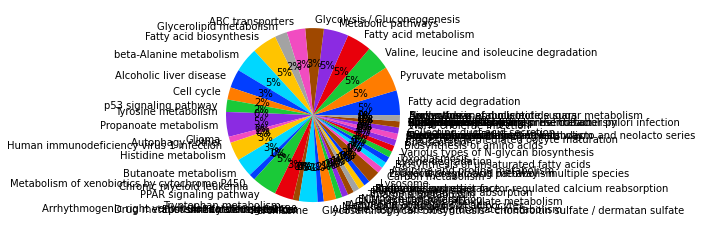

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.pie(aDict.values(), labels=aDict.keys(), colors=sns.color_palette('bright'), autopct='%.0f%%')